<a href="https://colab.research.google.com/github/priteshkakani/DataSciencePractice/blob/main/LogisticRegression_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/diabetes1.csv')

data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
sns.countplot(x='Pregnancies',data=data)

NameError: name 'sns' is not defined

In [ ]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

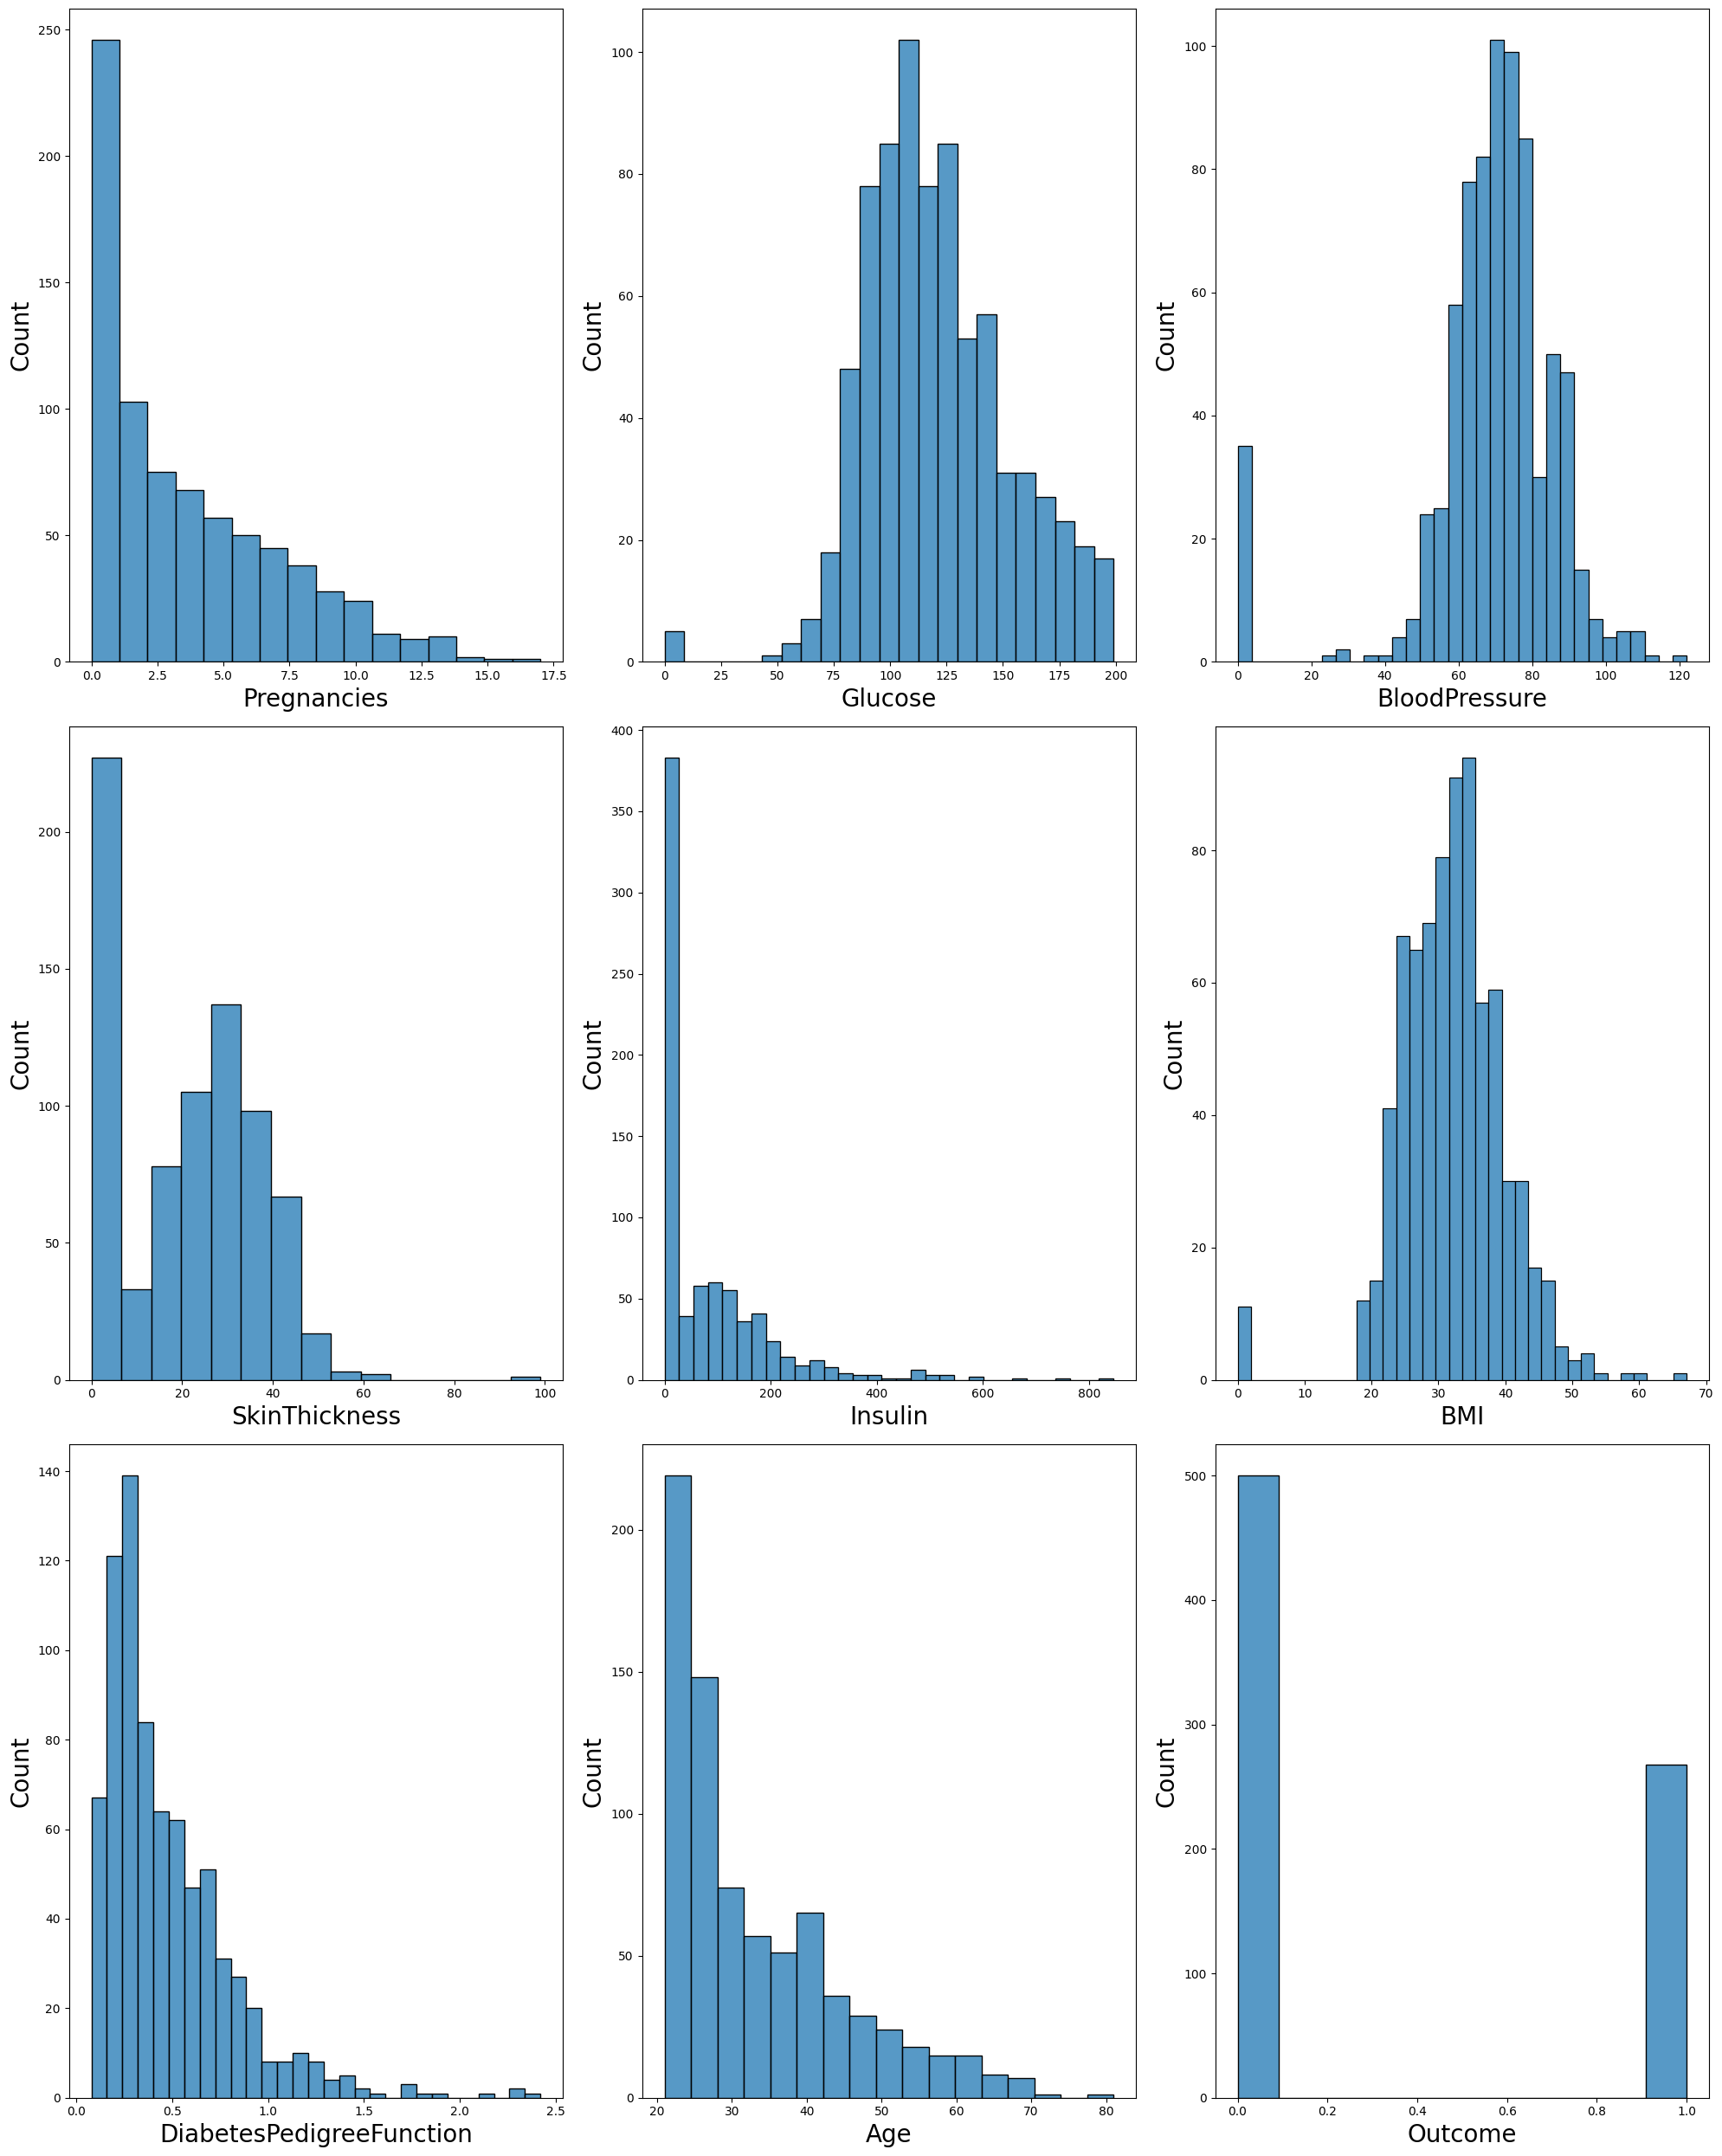

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
  if plotnumber <=9:
    ax = plt.subplot(3,3,plotnumber)
    sns.histplot(data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
  plotnumber+=1
plt.tight_layout()

In [ ]:
for column in data:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


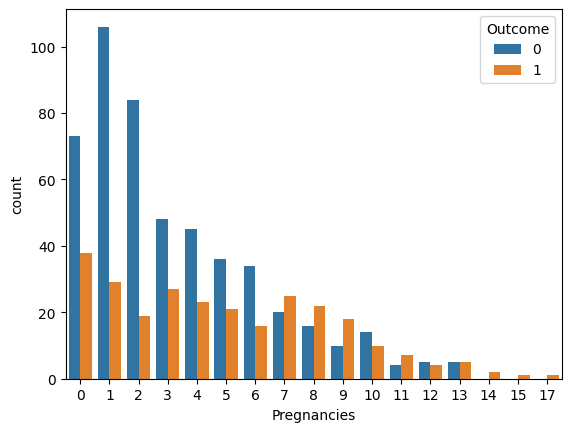

In [ ]:
sns.countplot(x='Pregnancies',hue='Outcome',data=data)
plt.show()

<Axes: xlabel='Glucose', ylabel='Count'>

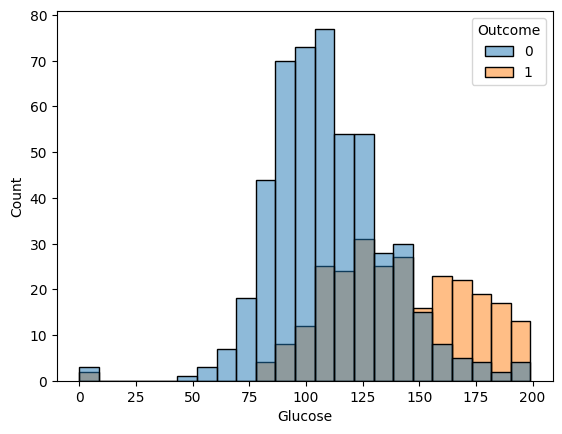

In [ ]:
sns.histplot(x='Glucose',hue='Outcome',data=data)


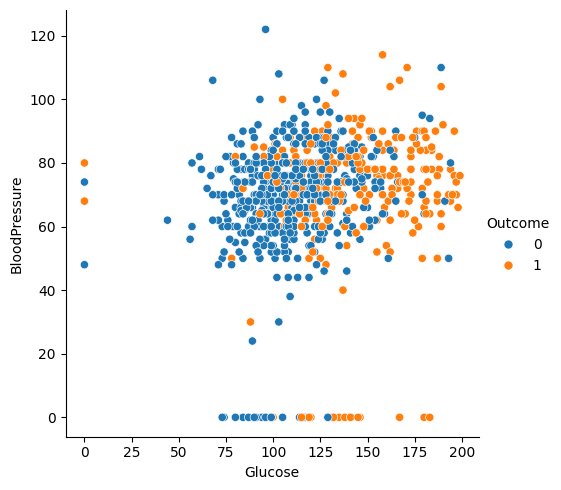

In [ ]:
sns.relplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

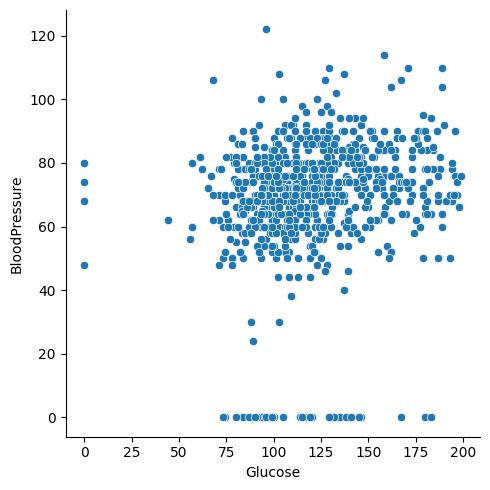

In [ ]:
sns.relplot(x='Glucose',y='BloodPressure',data=data)
plt.show()

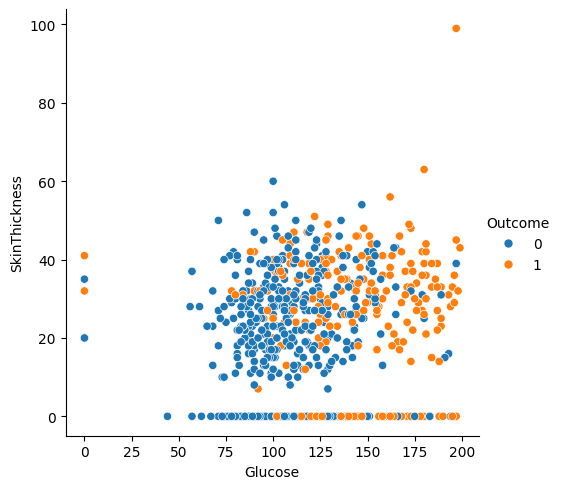

In [ ]:
sns.relplot(x='Glucose',y='SkinThickness',hue='Outcome',data=data)
plt.show()

<Axes: xlabel='BloodPressure', ylabel='Count'>

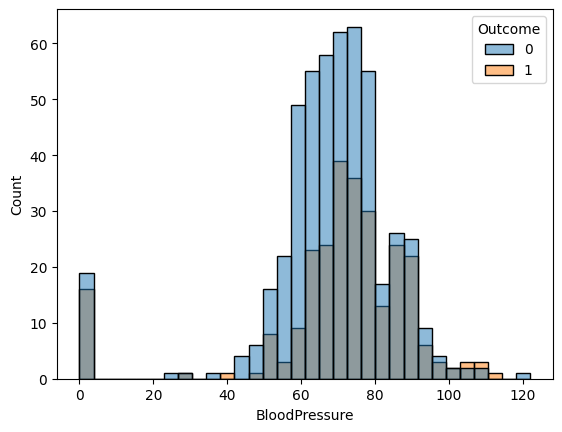

In [ ]:
sns.histplot(x="BloodPressure",hue='Outcome',data=data)

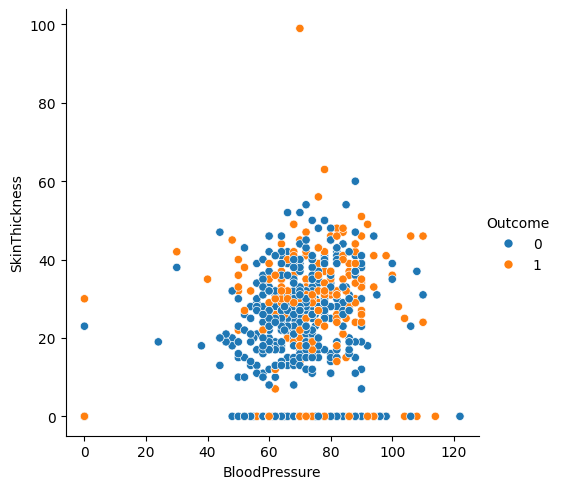

In [ ]:
sns.relplot(x='BloodPressure',y='SkinThickness',hue='Outcome',data=data)
plt.show()

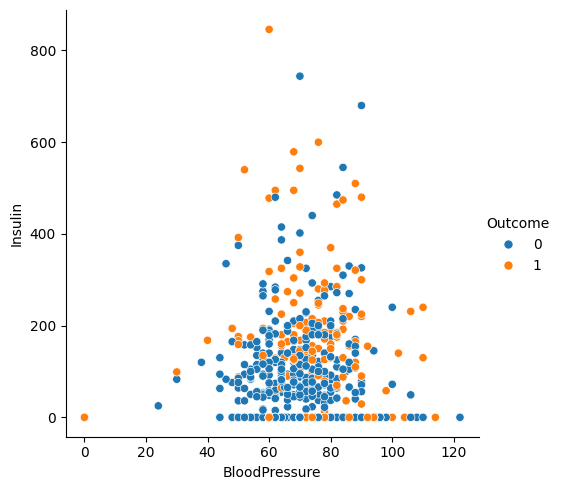

In [ ]:
sns.relplot(x='BloodPressure',y='Insulin',hue='Outcome',data=data)
plt.show()

<Axes: xlabel='Insulin', ylabel='Count'>

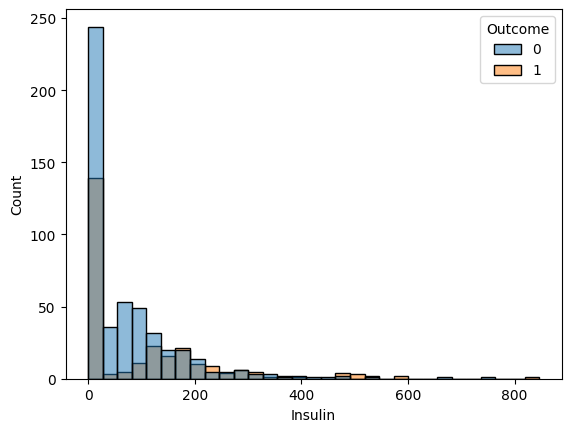

In [ ]:
sns.histplot(x='Insulin',hue='Outcome',data=data)


In [ ]:
#Data Processing and Feature Engineering

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.Glucose.replace(0,np.median(data.Glucose),inplace=True)
data.loc[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
data.loc[data['BMI'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
44,0,110,0,0,0,0.0,0.000,0,0
49,7,105,0,0,0,0.0,0.305,24,0
56,0,110,0,0,0,0.0,0.000,0,0
57,0,110,0,0,0,0.0,0.000,0,0
...,...,...,...,...,...,...,...,...,...
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [ ]:
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)
data.BMI.replace(0,np.median(data.BMI),inplace=True)

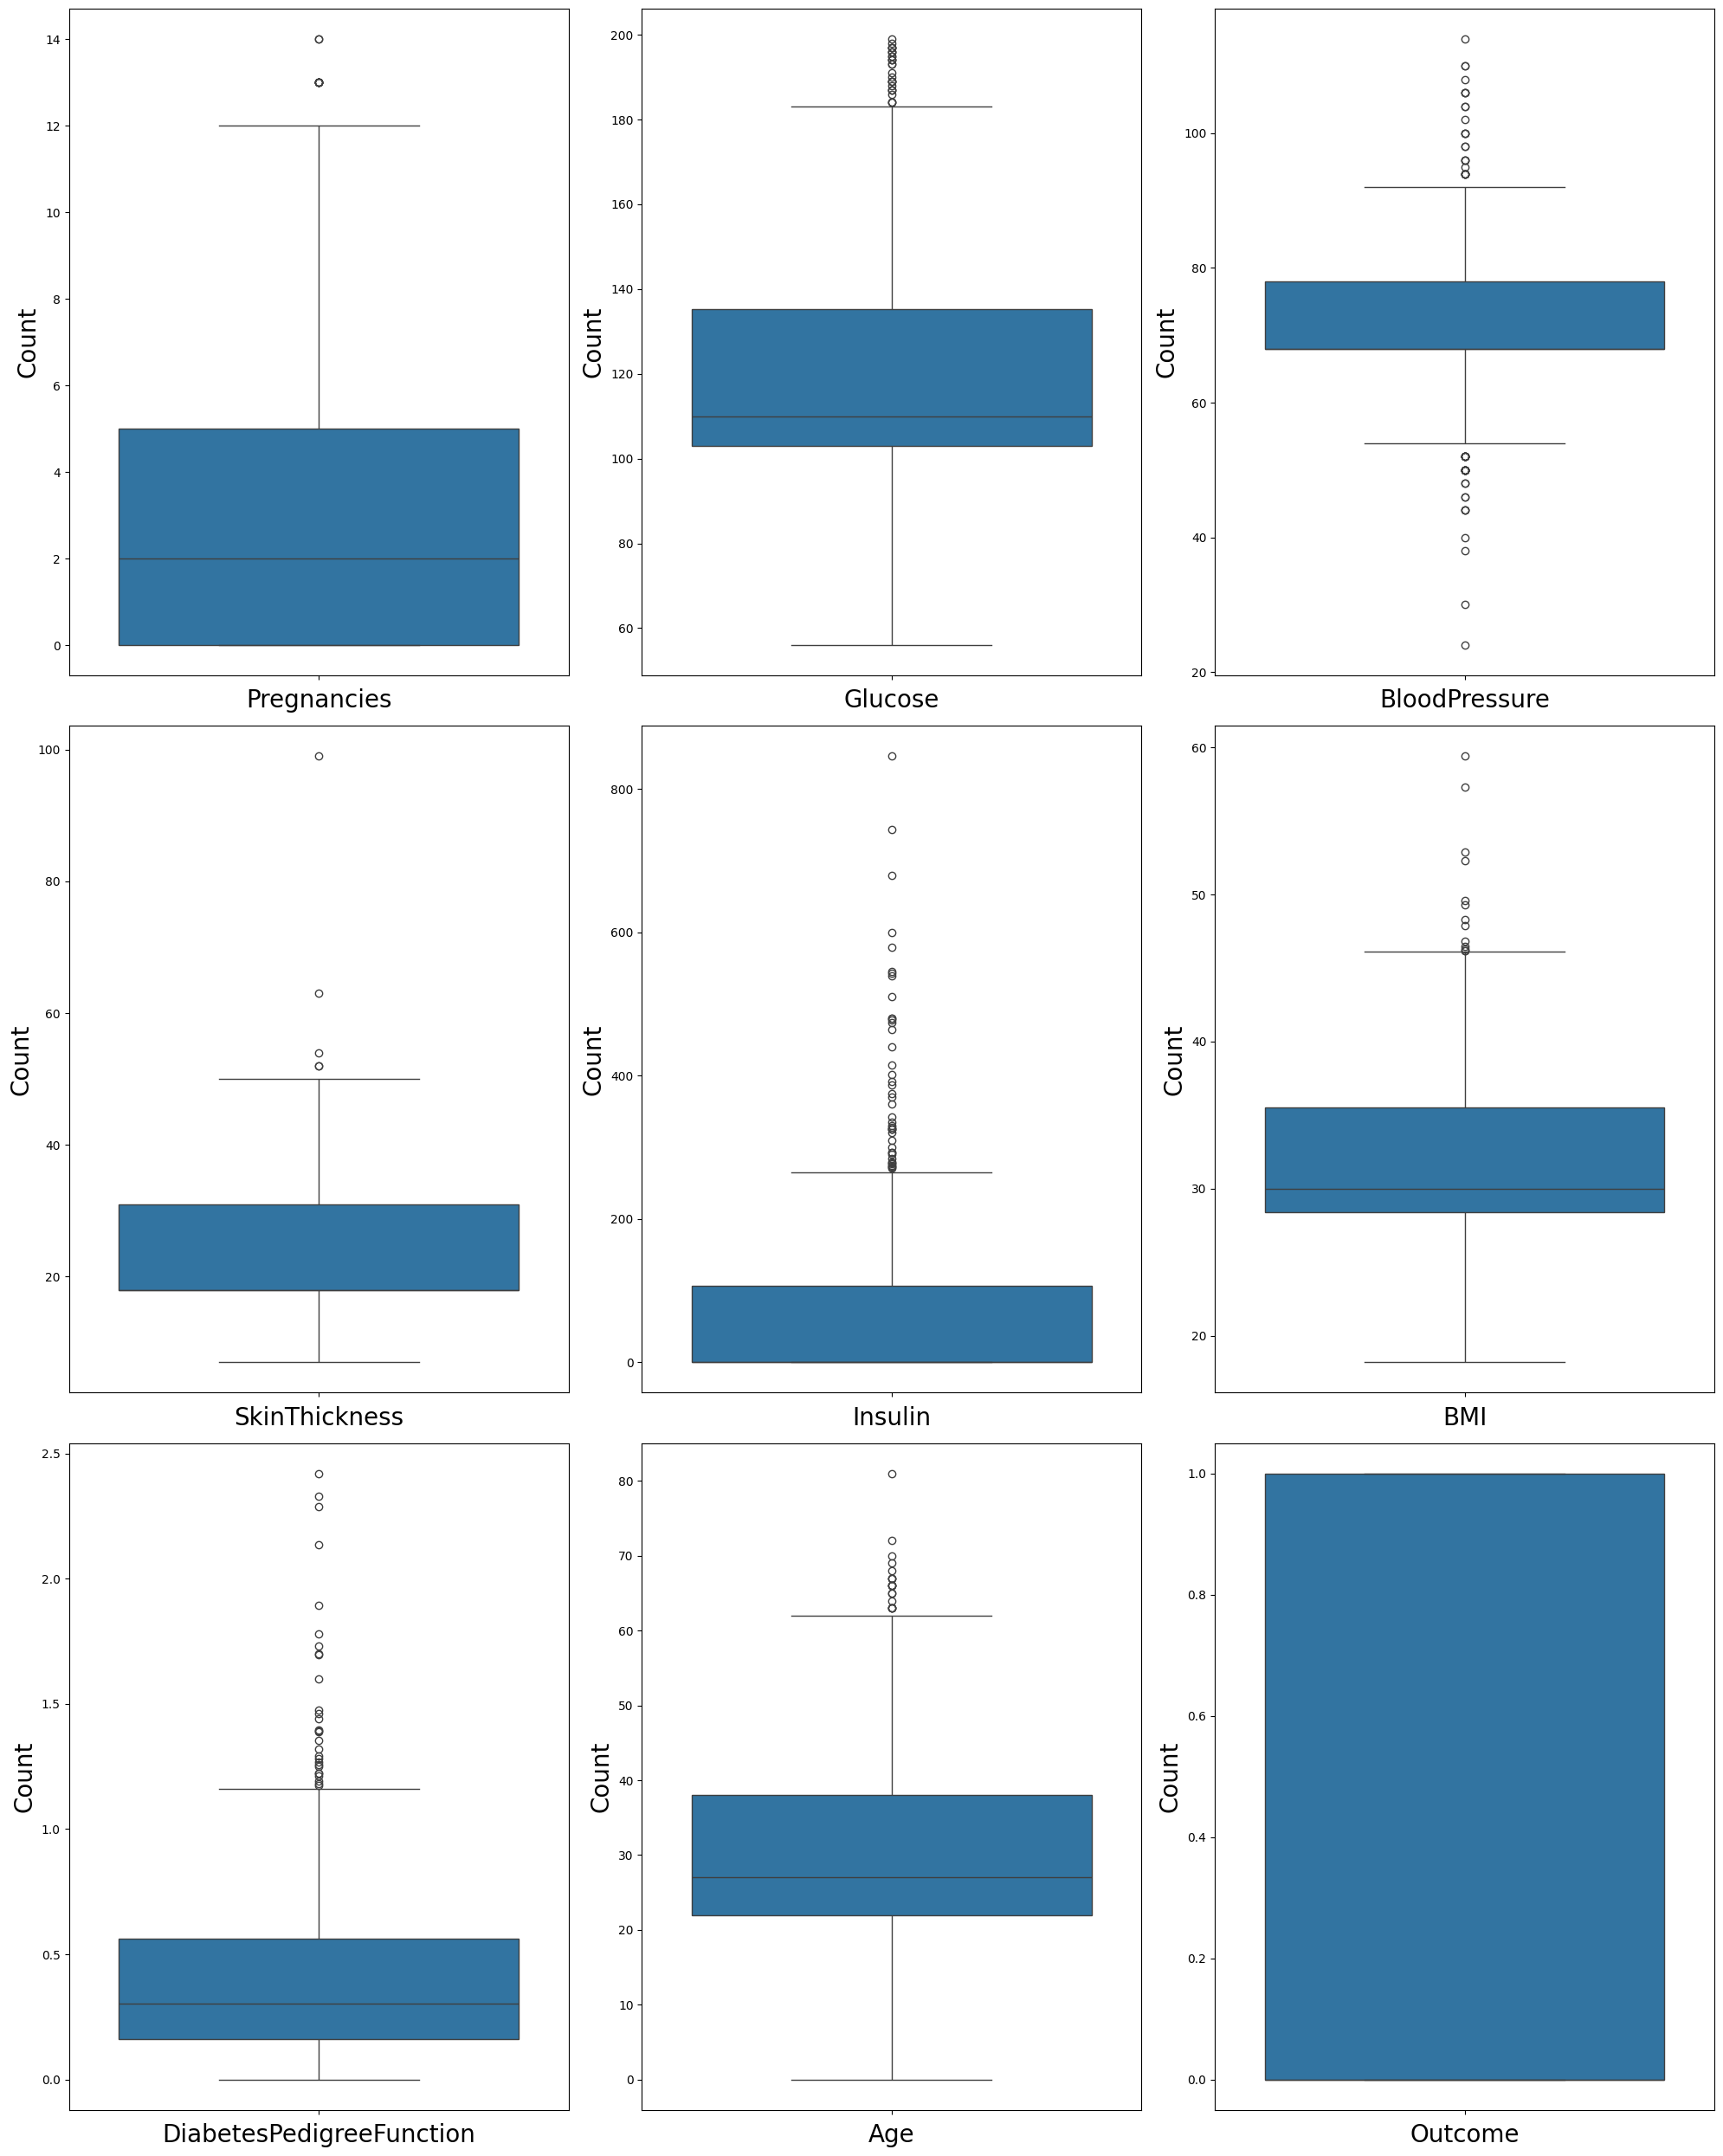

In [ ]:
#Step 4: checking outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
  if plotnumber <=9:
    ax = plt.subplot(3,3,plotnumber)
    sns.boxplot(data[column])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Count',fontsize=20)
  plotnumber+=1
plt.tight_layout()

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,18,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Step 5: Scaling data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
dl = ['Pregnancies','Outcome']
data1 = sc.fit_transform(data.drop(dl,axis=1))

In [ ]:
data1

array([[0.64335664, 0.53333333, 0.30434783, ..., 0.37378641, 0.25909091,
        0.61728395],
       [0.2027972 , 0.46666667, 0.23913043, ..., 0.2038835 , 0.14504132,
        0.38271605],
       [0.88811189, 0.44444444, 0.11956522, ..., 0.12378641, 0.27768595,
        0.39506173],
       ...,
       [0.45454545, 0.53333333, 0.17391304, ..., 0.19417476, 0.10123967,
        0.37037037],
       [0.48951049, 0.4       , 0.11956522, ..., 0.28883495, 0.14421488,
        0.58024691],
       [0.25874126, 0.51111111, 0.26086957, ..., 0.2961165 , 0.13016529,
        0.28395062]])

In [ ]:
con_data = data[['Pregnancies','Outcome']]

In [ ]:
con_data

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data2 = pd.DataFrame(data,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
data2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
type(data1)

numpy.ndarray

In [ ]:
nD = pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
nD

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.643357,0.533333,0.304348,0.000000,0.373786,0.259091,0.617284
1,0.202797,0.466667,0.239130,0.000000,0.203883,0.145041,0.382716
2,0.888112,0.444444,0.119565,0.000000,0.123786,0.277686,0.395062
3,0.230769,0.466667,0.173913,0.111111,0.240291,0.069008,0.259259
4,0.566434,0.177778,0.304348,0.198582,0.604369,0.945455,0.407407
...,...,...,...,...,...,...,...
763,0.314685,0.577778,0.445652,0.212766,0.356796,0.070661,0.777778
764,0.461538,0.511111,0.217391,0.000000,0.451456,0.140496,0.333333
765,0.454545,0.533333,0.173913,0.132388,0.194175,0.101240,0.370370
766,0.489510,0.400000,0.119565,0.000000,0.288835,0.144215,0.580247


In [ ]:
final_df = pd.concat([nD,con_data],axis=1)

In [ ]:
final_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.643357,0.533333,0.304348,0.000000,0.373786,0.259091,0.617284,6,1
1,0.202797,0.466667,0.239130,0.000000,0.203883,0.145041,0.382716,1,0
2,0.888112,0.444444,0.119565,0.000000,0.123786,0.277686,0.395062,8,1
3,0.230769,0.466667,0.173913,0.111111,0.240291,0.069008,0.259259,1,0
4,0.566434,0.177778,0.304348,0.198582,0.604369,0.945455,0.407407,0,1
...,...,...,...,...,...,...,...,...,...
763,0.314685,0.577778,0.445652,0.212766,0.356796,0.070661,0.777778,10,0
764,0.461538,0.511111,0.217391,0.000000,0.451456,0.140496,0.333333,2,0
765,0.454545,0.533333,0.173913,0.132388,0.194175,0.101240,0.370370,5,0
766,0.489510,0.400000,0.119565,0.000000,0.288835,0.144215,0.580247,1,1


In [ ]:
#Feature Selection
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,18,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,18,0,30.1,0.349,47


<Axes: >

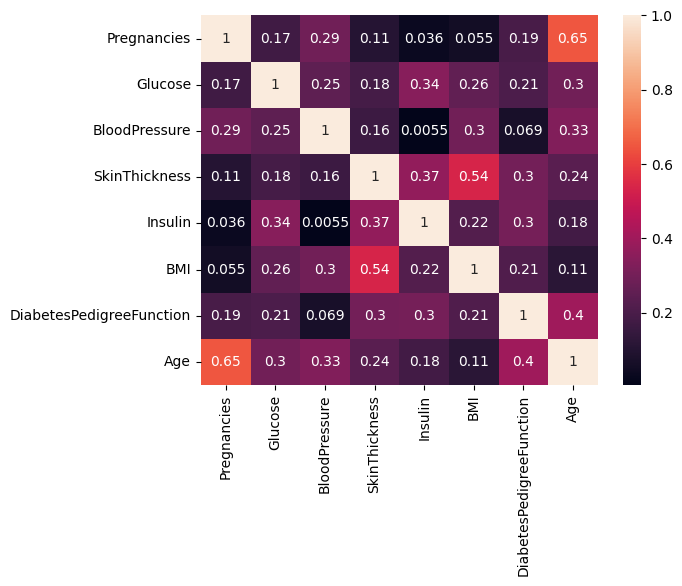

In [ ]:
sns.heatmap(data2.corr(),annot=True)

In [ ]:
#Model Creation
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,18,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,18,0,30.1,0.349,47,1


In [ ]:
X = data.iloc[:,:-1]
X=X.iloc[:,1:]

In [ ]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,18,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,18,0,30.1,0.349,47


In [ ]:
y=data.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=45)

In [ ]:
y_test

195    0
51     0
66     1
437    0
665    0
      ..
671    0
422    0
742    0
331    0
699    0
Name: Outcome, Length: 192, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
y_pred_prob = clf.predict_proba(X_test)

In [ ]:
y_pred_prob

array([[0.9716521 , 0.0283479 ],
       [0.91809622, 0.08190378],
       [0.68226432, 0.31773568],
       [0.56989992, 0.43010008],
       [0.86555152, 0.13444848],
       [0.91271595, 0.08728405],
       [0.9716521 , 0.0283479 ],
       [0.96677521, 0.03322479],
       [0.27017538, 0.72982462],
       [0.94691897, 0.05308103],
       [0.12792803, 0.87207197],
       [0.37981617, 0.62018383],
       [0.91334853, 0.08665147],
       [0.37909188, 0.62090812],
       [0.9716521 , 0.0283479 ],
       [0.9716521 , 0.0283479 ],
       [0.01862099, 0.98137901],
       [0.54361882, 0.45638118],
       [0.31299584, 0.68700416],
       [0.9716521 , 0.0283479 ],
       [0.41723827, 0.58276173],
       [0.9716521 , 0.0283479 ],
       [0.37962502, 0.62037498],
       [0.8349273 , 0.1650727 ],
       [0.7966672 , 0.2033328 ],
       [0.22789359, 0.77210641],
       [0.89559089, 0.10440911],
       [0.20912614, 0.79087386],
       [0.04654991, 0.95345009],
       [0.9716521 , 0.0283479 ],
       [0.

In [ ]:
data.Outcome.value_counts()

Outcome
0    544
1    224
Name: count, dtype: int64

In [ ]:
#Evaluation of Model

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
print(cm)

[[123  20]
 [ 23  26]]


In [ ]:
recall = recall_score(y_test,y_pred)
recall

0.5306122448979592

In [ ]:
precision=precision_score(y_test,y_pred)
precision

0.5652173913043478

In [ ]:
f1score=f1_score(y_test,y_pred)
f1score

0.5473684210526316

In [ ]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       143
           1       0.57      0.53      0.55        49

    accuracy                           0.78       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.77      0.78      0.77       192



In [ ]:
y_test.value_counts()

Outcome
0    143
1     49
Name: count, dtype: int64